In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.models import Sequential

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

Using TensorFlow backend.


In [2]:
batch_size = 128

train_datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range=10.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    'dataset/train/',
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=batch_size,
    classes=['zero', 'one', 'two', 'three', 'four', 'five'],
    class_mode='categorical'
)

test_gen = test_datagen.flow_from_directory(
    'dataset/test/',
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=batch_size,
    classes=['zero', 'one', 'two', 'three', 'four', 'five'],
    class_mode='categorical'
)

Found 1001 images belonging to 6 classes.
Found 201 images belonging to 6 classes.


Text(0.5, 0, 'Class')

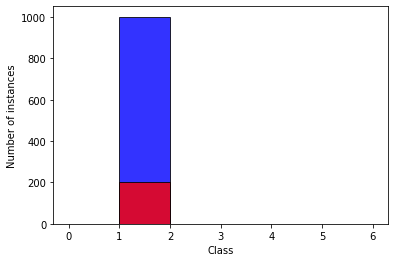

In [3]:
h1, _, _ = plt.hist(
    train_gen.classes, 
    bins=range(7), 
    alpha=.8, 
    color='blue', 
    edgecolor='black'
)
h2, _, _ = plt.hist(
    test_gen.classes, 
    bins=range(7), 
    alpha=.8, 
    color='red', 
    edgecolor='black'
)
plt.ylabel('Number of instances')
plt.xlabel('Class')

(128, 28, 28, 1) (128, 6)


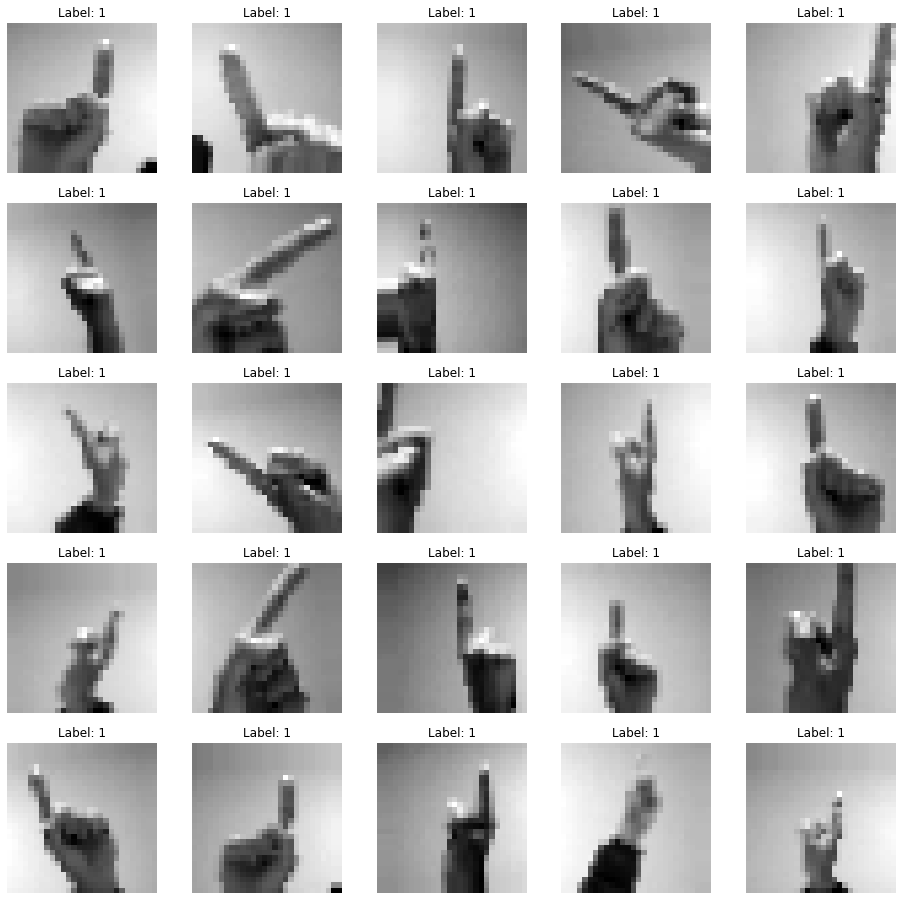

In [4]:
X, y = train_gen.next()
print(X.shape, y.shape)

plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.axis('off')
    plt.title('Label: %d' % np.argmax(y[i]))
    img = np.uint8(255*X[i, :, :, 0])
    plt.imshow(img, cmap='gray')

In [5]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [6]:
model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['acc'])

In [7]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='weights.{epoch:02d}-{val_loss:.2f}.hdf5')
]

In [8]:
history = model.fit_generator(
    train_gen,
    steps_per_epoch=120,
    epochs=40,
    validation_data=test_gen,
    validation_steps=28,
    callbacks=callbacks
)

Epoch 1/40
120/120 [==============================] - 58s 483ms/step - loss: 0.0170 - acc: 0.9936 - val_loss: 2.4234e-06 - val_acc: 1.0000
Epoch 2/40
120/120 [==============================] - 44s 371ms/step - loss: 2.2563e-05 - acc: 1.0000 - val_loss: 1.6330e-08 - val_acc: 1.0000
Epoch 3/40
120/120 [==============================] - 44s 370ms/step - loss: 4.6024e-06 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 4/40
120/120 [==============================] - 44s 370ms/step - loss: 2.4351e-06 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 5/40
120/120 [==============================] - 44s 368ms/step - loss: 2.3199e-06 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 6/40
120/120 [==============================] - 44s 368ms/step - loss: 1.3822e-06 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 7/40
120/120 [==============================] - 46s 382ms/step - loss: 1.0328e-06 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epo

Text(0.5, 0, 'Epochs')

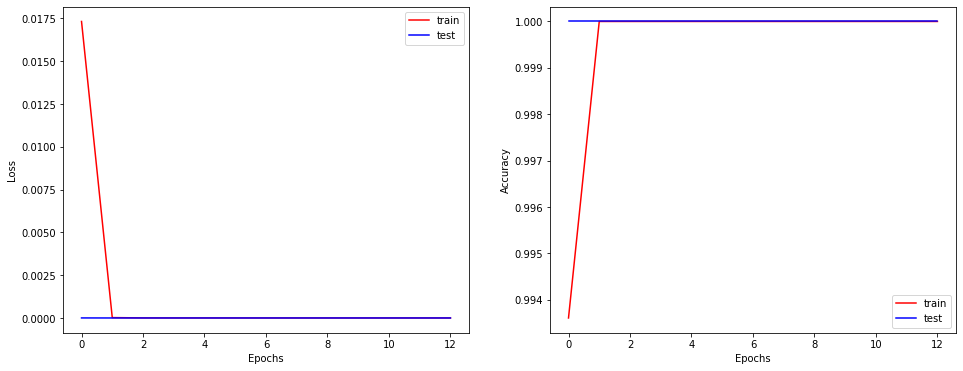

In [9]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
epochs = len(history.history['loss'])
plt.plot(range(epochs), history.history['loss'], 'r-', label='train')
plt.plot(range(epochs), history.history['val_loss'], 'b-', label='test')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.subplot(1,2,2)
epochs = len(history.history['loss'])
plt.plot(range(epochs), history.history['acc'], 'r-', label='train')
plt.plot(range(epochs), history.history['val_acc'], 'b-', label='test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

In [10]:
model.save("model_1.h5")